In [ ]:
from google.colab import drive
drive.mount('/content/drive') 

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

import tensorflow as tf

from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/minor project 2/dataset/emotions.csv')

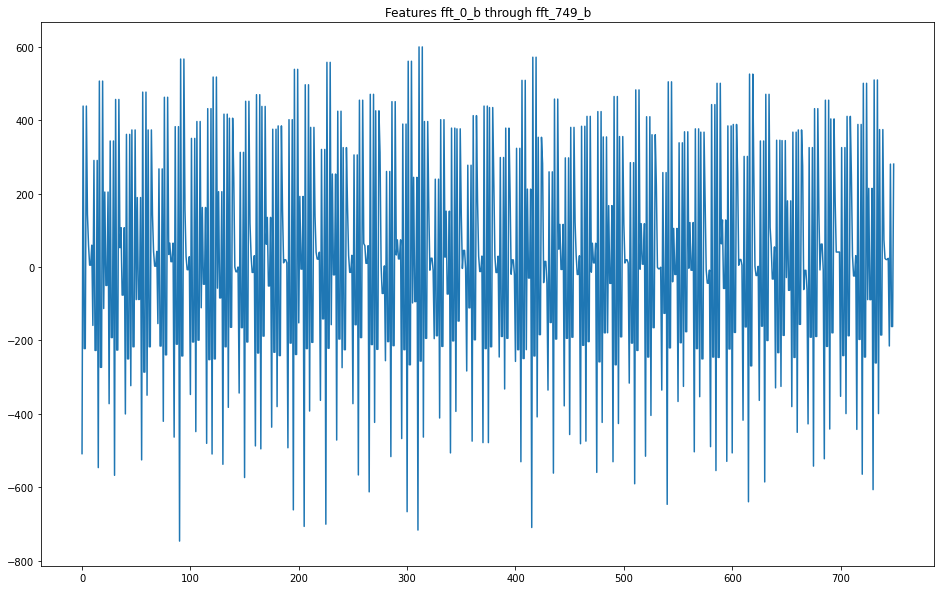

In [ ]:
sample = df.loc[0, 'fft_0_b':'fft_749_b']

plt.figure(figsize=(16, 10))
plt.plot(range(len(sample)), sample)
plt.title("Features fft_0_b through fft_749_b")
plt.show()

In [ ]:
label_mapping = {'NEGATIVE': 0, 'NEUTRAL': 1, 'POSITIVE': 2}


# Data Splitting

In [ ]:
def preprocess_inputs(df):
    df = df.copy()
    
    df['label'] = df['label'].replace(label_mapping)
    
    y = df['label'].copy()
    X = df.drop('label', axis=1).copy()
    
    x_train, x_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=123)
    
    return x_train, x_test, y_train, y_test
x_train, x_test, y_train, y_test = preprocess_inputs(df)


#Model Creation


In [ ]:
inputs = tf.keras.Input(shape=(x_train.shape[1],))

expand_dims = tf.expand_dims(inputs, axis=2)

lstm = tf.keras.layers.LSTM(256, return_sequences=True)(expand_dims)

flatten = tf.keras.layers.Flatten()(lstm)

outputs = tf.keras.layers.Dense(3, activation='softmax')(flatten)


model = tf.keras.Model(inputs=inputs, outputs=outputs)
print(model.summary())

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 2548)]            0         
                                                                 
 tf.expand_dims_1 (TFOpLambd  (None, 2548, 1)          0         
 a)                                                              
                                                                 
 lstm (LSTM)                 (None, 2548, 256)         264192    
                                                                 
 flatten_1 (Flatten)         (None, 652288)            0         
                                                                 
 dense_4 (Dense)             (None, 3)                 1956867   
                                                                 
Total params: 2,221,059
Trainable params: 2,221,059
Non-trainable params: 0
_________________________________________________

In [ ]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

history_lstm = model.fit(
    x_train,
    y_train,
    validation_split=0.2,
    batch_size=32,
    epochs=50,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=5,
            restore_best_weights=True
        )
    ]
)

Epoch 1/50
38/38 [==============================] - 7s 145ms/step - loss: 7.4001 - accuracy: 0.8324 - val_loss: 6.0845 - val_accuracy: 0.8896
Epoch 2/50
38/38 [==============================] - 5s 134ms/step - loss: 1.6998 - accuracy: 0.9497 - val_loss: 1.3640 - val_accuracy: 0.9331
Epoch 3/50
38/38 [==============================] - 5s 133ms/step - loss: 0.1886 - accuracy: 0.9816 - val_loss: 2.7107 - val_accuracy: 0.9164
Epoch 4/50
38/38 [==============================] - 5s 133ms/step - loss: 0.3014 - accuracy: 0.9774 - val_loss: 0.7802 - val_accuracy: 0.9431
Epoch 5/50
38/38 [==============================] - 5s 134ms/step - loss: 0.2733 - accuracy: 0.9757 - val_loss: 1.6727 - val_accuracy: 0.9599
Epoch 6/50
38/38 [==============================] - 6s 148ms/step - loss: 0.4146 - accuracy: 0.9841 - val_loss: 2.9872 - val_accuracy: 0.9130
Epoch 7/50
38/38 [==============================] - 5s 134ms/step - loss: 0.4939 - accuracy: 0.9774 - val_loss: 5.9636 - val_accuracy: 0.8428
Epoch 

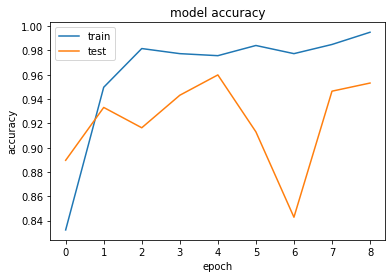

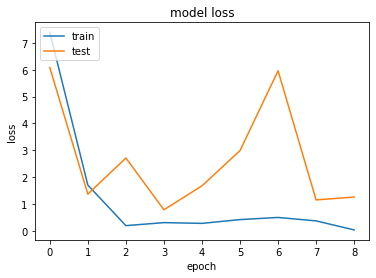

In [ ]:
plt.plot(history_lstm.history['accuracy'])
plt.plot(history_lstm.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history_lstm.history['loss'])
plt.plot(history_lstm.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
model_acc = history_lstm.model.evaluate(x_test, y_test, verbose=0)[1]
print("Test Accuracy: {:.3f}%".format(model_acc * 100))

Test Accuracy: 94.531%


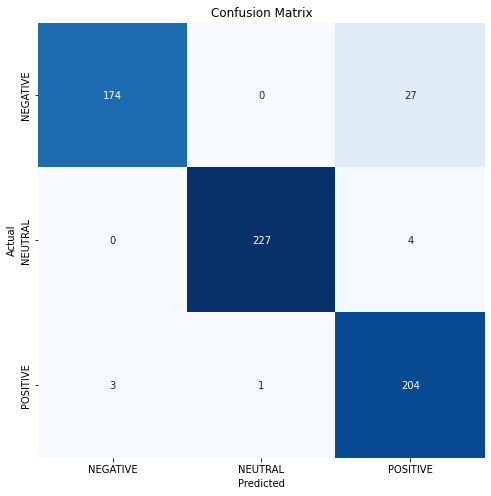

              precision    recall  f1-score   support

    NEGATIVE       0.98      0.87      0.92       201
     NEUTRAL       1.00      0.98      0.99       231
    POSITIVE       0.87      0.98      0.92       208

    accuracy                           0.95       640
   macro avg       0.95      0.94      0.94       640
weighted avg       0.95      0.95      0.95       640



In [ ]:
y_pred=np.array(list(map(lambda x: np.argmax(x), model.predict(x_test))))

cm=confusion_matrix(y_test,y_pred)
clr=classification_report(y_test,y_pred,target_names=label_mapping.keys())

plt.figure(figsize=(8,8))
sns.heatmap(cm,annot=True, vmin=0, fmt='g',cbar=False,cmap='Blues')
plt.xticks(np.arange(3)+0.5,label_mapping.keys())
plt.yticks(np.arange(3)+0.5,label_mapping.keys())
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

print(clr)

In [ ]:
print(y_test)
model.predict(x_test)

1676    0
1074    0
1451    2
1134    1
912     0
       ..
316     2
1016    0
1209    0
36      2
1467    1
Name: label, Length: 640, dtype: int64


array([[1.0000000e+00, 0.0000000e+00, 3.3025941e-18],
       [1.0000000e+00, 0.0000000e+00, 2.0541295e-08],
       [0.0000000e+00, 0.0000000e+00, 1.0000000e+00],
       ...,
       [1.3788701e-11, 0.0000000e+00, 1.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 1.0000000e+00],
       [0.0000000e+00, 1.0000000e+00, 0.0000000e+00]], dtype=float32)

#RNN implementation

In [ ]:
print("x_train and y_train")
print(x_train.shape,y_train.shape)
print("\n---------------------\n")
print("x_test and y_test")
print(x_test.shape,y_test.shape)

x_train and y_train
(1492, 2548) (1492,)

---------------------

x_test and y_test
(640, 2548) (640,)


In [ ]:
inputs = tf.keras.Input(shape=(x_train.shape[1],))

x=tf.keras.layers.Dense(64, activation='relu')(inputs)
x=tf.keras.layers.Dense(64, activation='relu')(x)

outputs = tf.keras.layers.Dense(3, activation='softmax')(x)

model = tf.keras.Model(inputs=inputs, outputs=outputs)
print(model.summary())

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 2548)]            0         
                                                                 
 dense_1 (Dense)             (None, 64)                163136    
                                                                 
 dense_2 (Dense)             (None, 64)                4160      
                                                                 
 dense_3 (Dense)             (None, 3)                 195       
                                                                 
Total params: 167,491
Trainable params: 167,491
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

history_rnn = model.fit(
    x_train,
    y_train,
    validation_split=0.2,
    batch_size=32,
    epochs=50,
)

Epoch 1/50
38/38 [==============================] - 2s 19ms/step - loss: 4128082755584.0000 - accuracy: 0.4996 - val_loss: 5101776797696.0000 - val_accuracy: 0.5552
Epoch 2/50
38/38 [==============================] - 0s 8ms/step - loss: 20131700801536.0000 - accuracy: 0.5281 - val_loss: 4870722551808.0000 - val_accuracy: 0.6656
Epoch 3/50
38/38 [==============================] - 0s 7ms/step - loss: 40502913138688.0000 - accuracy: 0.5407 - val_loss: 45371816411136.0000 - val_accuracy: 0.5518
Epoch 4/50
38/38 [==============================] - 0s 7ms/step - loss: 31519580094464.0000 - accuracy: 0.5038 - val_loss: 24128633438208.0000 - val_accuracy: 0.5418
Epoch 5/50
38/38 [==============================] - 0s 7ms/step - loss: 13095179124736.0000 - accuracy: 0.4669 - val_loss: 383758270464.0000 - val_accuracy: 0.6020
Epoch 6/50
38/38 [==============================] - 0s 7ms/step - loss: 1113315082240.0000 - accuracy: 0.5859 - val_loss: 237617446912.0000 - val_accuracy: 0.6288
Epoch 7/50


In [ ]:
model_acc = history_rnn.model.evaluate(x_test, y_test, verbose=0)[1]
print("Test Accuracy: {:.3f}%".format(model_acc * 100))

Test Accuracy: 54.062%


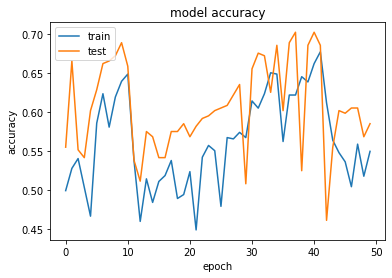

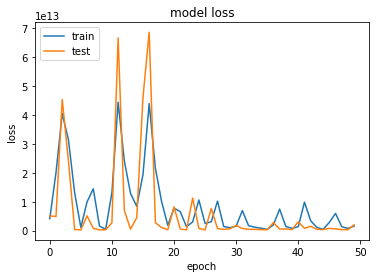

In [ ]:
plt.plot(history_rnn.history['accuracy'])
plt.plot(history_rnn.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history_rnn.history['loss'])
plt.plot(history_rnn.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

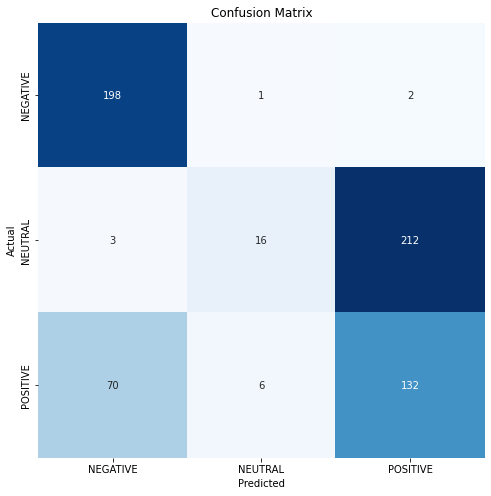

              precision    recall  f1-score   support

    NEGATIVE       0.73      0.99      0.84       201
     NEUTRAL       0.70      0.07      0.13       231
    POSITIVE       0.38      0.63      0.48       208

    accuracy                           0.54       640
   macro avg       0.60      0.56      0.48       640
weighted avg       0.60      0.54      0.46       640



In [ ]:
y_pred=np.array(list(map(lambda x: np.argmax(x), model.predict(x_test))))

cm=confusion_matrix(y_test,y_pred)
clr=classification_report(y_test,y_pred,target_names=label_mapping.keys())

plt.figure(figsize=(8,8))
sns.heatmap(cm,annot=True, vmin=0, fmt='g',cbar=False,cmap='Blues')
plt.xticks(np.arange(3)+0.5,label_mapping.keys())
plt.yticks(np.arange(3)+0.5,label_mapping.keys())
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

print(clr)

#GRU implementation

In [ ]:
inputs = tf.keras.Input(shape=(x_train.shape[1],))

expand_dims = tf.expand_dims(inputs, axis=2)

gru = tf.keras.layers.GRU(256, return_sequences=True)(expand_dims)

flatten = tf.keras.layers.Flatten()(gru)

outputs = tf.keras.layers.Dense(3, activation='softmax')(flatten)


model = tf.keras.Model(inputs=inputs, outputs=outputs)
print(model.summary())

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 2548)]            0         
                                                                 
 tf.expand_dims (TFOpLambda)  (None, 2548, 1)          0         
                                                                 
 gru (GRU)                   (None, 2548, 256)         198912    
                                                                 
 flatten (Flatten)           (None, 652288)            0         
                                                                 
 dense (Dense)               (None, 3)                 1956867   
                                                                 
Total params: 2,155,779
Trainable params: 2,155,779
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

history2 = model.fit(
    x_train,
    y_train,
    validation_split=0.2,
    batch_size=32,
    epochs=50,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=5,
            restore_best_weights=True
        )
    ]
)

Epoch 1/50
38/38 [==============================] - 7s 131ms/step - loss: 0.8826 - accuracy: 0.9858 - val_loss: 11.5315 - val_accuracy: 0.9064
Epoch 2/50
38/38 [==============================] - 4s 114ms/step - loss: 2.9147 - accuracy: 0.9690 - val_loss: 5.3206 - val_accuracy: 0.9632
Epoch 3/50
38/38 [==============================] - 6s 159ms/step - loss: 2.2241 - accuracy: 0.9749 - val_loss: 4.8995 - val_accuracy: 0.9632
Epoch 4/50
38/38 [==============================] - 4s 115ms/step - loss: 2.0806 - accuracy: 0.9740 - val_loss: 6.0148 - val_accuracy: 0.9565
Epoch 5/50
38/38 [==============================] - 5s 122ms/step - loss: 0.7987 - accuracy: 0.9908 - val_loss: 6.3214 - val_accuracy: 0.9532
Epoch 6/50
38/38 [==============================] - 4s 117ms/step - loss: 0.7278 - accuracy: 0.9899 - val_loss: 6.7944 - val_accuracy: 0.9532
Epoch 7/50
38/38 [==============================] - 4s 116ms/step - loss: 0.5508 - accuracy: 0.9933 - val_loss: 10.8094 - val_accuracy: 0.9666
Epoc

In [ ]:
model_acc = history2.model.evaluate(x_test, y_test, verbose=0)[1]
print("Test Accuracy: {:.3f}%".format(model_acc * 100))

Test Accuracy: 95.781%


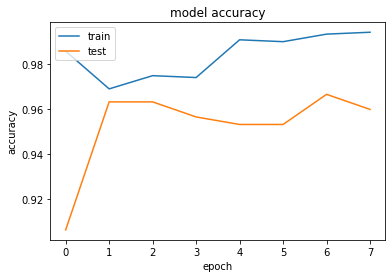

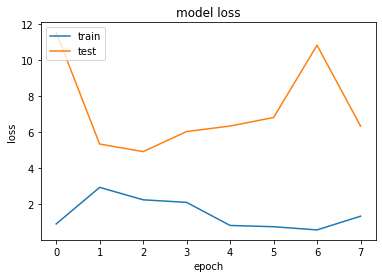

In [ ]:
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
print(y_test)
model.predict(x_test)

1676    0
1074    0
1451    2
1134    1
912     0
       ..
316     2
1016    0
1209    0
36      2
1467    1
Name: label, Length: 640, dtype: int64


array([[1.000000e+00, 0.000000e+00, 0.000000e+00],
       [1.000000e+00, 0.000000e+00, 0.000000e+00],
       [0.000000e+00, 2.988388e-30, 1.000000e+00],
       ...,
       [1.000000e+00, 0.000000e+00, 0.000000e+00],
       [0.000000e+00, 0.000000e+00, 1.000000e+00],
       [0.000000e+00, 1.000000e+00, 0.000000e+00]], dtype=float32)

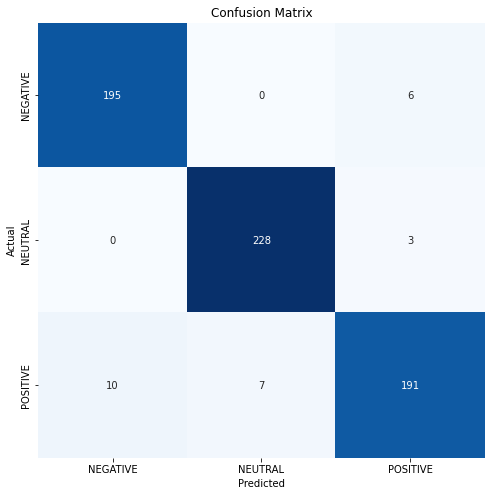

              precision    recall  f1-score   support

    NEGATIVE       0.95      0.97      0.96       201
     NEUTRAL       0.97      0.99      0.98       231
    POSITIVE       0.95      0.92      0.94       208

    accuracy                           0.96       640
   macro avg       0.96      0.96      0.96       640
weighted avg       0.96      0.96      0.96       640



In [ ]:
y_pred=np.array(list(map(lambda x: np.argmax(x), model.predict(x_test))))

cm=confusion_matrix(y_test,y_pred)
clr=classification_report(y_test,y_pred,target_names=label_mapping.keys())

plt.figure(figsize=(8,8))
sns.heatmap(cm,annot=True, vmin=0, fmt='g',cbar=False,cmap='Blues')
plt.xticks(np.arange(3)+0.5,label_mapping.keys())
plt.yticks(np.arange(3)+0.5,label_mapping.keys())
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

print(clr)